In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv("Car details.csv")

In [3]:
cars.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [4]:
cars.shape #data frame dimentionen anzeigen

(8128, 13)

In [5]:
cars.isnull().sum() # gucken ober null stellen in der data frame gibt

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
cars = cars.dropna(how="any") #die spalte mit null werte löschen
cars.shape

(7906, 13)

In [7]:
import re # bibliothek für regulare expression importieren

In [8]:
# test ! nummern aus einem Strin extrahieren

res = '190Nm@ 2,000rpm'.replace(".","")
res = res.replace(",","")
a = [int(s) for s in re.findall(r'\d+',res)] 
a

[190, 2000]

In [9]:
torque_list = cars['torque'].tolist()
#torque_list[:2]
torque_rpm=[]

# eine funktion erstellen um die nummer zu extrahieren aus "Torque List"

def extractingRPM(x):
    for item in x:
        res = item.replace(".",".")
        res = item.replace(",","")
        temp = [int(s) for s in re.findall(r'\d+',res)]
        torque_rpm.append(max(temp))
        
extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [10]:
torque_rpm

[2000,
 2500,
 2700,
 2750,
 4500,
 4000,
 4500,
 2500,
 2400,
 2000,
 2250,
 4500,
 2000,
 3500,
 3600,
 1750,
 2750,
 3000,
 2750,
 2000,
 1750,
 2000,
 1750,
 3500,
 4000,
 3500,
 1750,
 3500,
 2500,
 1750,
 3000,
 4000,
 1750,
 3500,
 3500,
 4850,
 4000,
 2700,
 2500,
 2500,
 4600,
 4800,
 4000,
 1750,
 3500,
 3400,
 3400,
 4000,
 1750,
 2500,
 1750,
 4400,
 1750,
 3400,
 3600,
 2500,
 4000,
 3000,
 2800,
 3000,
 4000,
 2750,
 2000,
 4000,
 4000,
 3000,
 1750,
 3500,
 3000,
 1750,
 1750,
 4000,
 2000,
 3400,
 2000,
 4000,
 2500,
 3600,
 3250,
 4600,
 3500,
 4000,
 3500,
 3500,
 4500,
 3000,
 3500,
 3750,
 4500,
 3800,
 3500,
 4000,
 2000,
 4000,
 3000,
 2750,
 3500,
 3000,
 4200,
 3000,
 4000,
 2800,
 4250,
 4850,
 4500,
 3000,
 2800,
 2500,
 2750,
 2750,
 4000,
 3500,
 1750,
 4000,
 3500,
 1900,
 2750,
 3250,
 2000,
 4250,
 3500,
 3000,
 1750,
 3000,
 1750,
 4500,
 3000,
 5200,
 2500,
 4300,
 2250,
 2400,
 2500,
 2500,
 5000,
 1800,
 3600,
 4600,
 4000,
 400,
 2750,
 1750,
 1600,


In [11]:
# neue spalte erstellen in der data frame mit torque_rpm
cars['torque_rpm']= torque_rpm
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500


In [12]:
# die zahlen extrahieren von mileage
mil_list = cars['mileage'].to_list()
mil_kmpl = []
def extractingmil(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        mil_kmpl.append(max(temp))

In [13]:
extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:5])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14, 17.7, 23.0, 16.1]


In [14]:
# die fonktion testen 
try:
    for s in mil_list[1].split(" "):
            print(float(s))
except:
    pass

21.14


In [15]:
# neue spalte erstellen mit der extrahierten nummer von "mile age " spalte

cars['mil_kmpl'] = mil_kmpl

cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


In [16]:
# die zahlen extrahieren von "engine" spalte
engine_list = cars['engine'].to_list()
engine_cc = []
def extractingEngine(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        engine_cc.append(max(temp))

In [17]:
# die ergebnisse Anzeigen lassen

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [18]:
cars['engine_cc'] = engine_cc
cars.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70,1497.0


In [19]:
# die zahlen extrahieren von "max_power" spalte
power_list = cars['max_power'].to_list()
max_power = []
def extractingPower(x):
    for item in x:
        temp = []
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        max_power.append(max(temp))

In [20]:
extractingPower(power_list)

In [21]:
max_power

[74.0,
 103.52,
 78.0,
 90.0,
 88.2,
 81.86,
 57.5,
 37.0,
 67.1,
 68.1,
 108.45,
 60.0,
 73.9,
 67.0,
 82.0,
 88.5,
 90.0,
 46.3,
 88.73,
 64.1,
 98.6,
 74.0,
 88.8,
 83.81,
 83.1,
 47.3,
 73.8,
 67.0,
 34.2,
 88.5,
 35.0,
 81.83,
 88.5,
 40.3,
 67.1,
 121.3,
 67.0,
 138.03,
 37.0,
 160.77,
 117.3,
 116.3,
 83.14,
 88.5,
 67.05,
 168.5,
 100.0,
 120.7,
 98.63,
 175.56,
 98.6,
 103.25,
 98.6,
 171.5,
 100.6,
 174.33,
 138.03,
 187.74,
 170.0,
 88.8,
 78.9,
 88.76,
 74.0,
 86.8,
 83.1,
 108.495,
 98.6,
 67.0,
 108.62,
 88.5,
 88.5,
 78.9,
 74.0,
 168.5,
 74.0,
 93.7,
 103.6,
 100.6,
 98.59,
 189.0,
 67.04,
 67.05,
 47.3,
 47.3,
 68.05,
 35.0,
 58.2,
 74.0,
 68.05,
 103.6,
 67.1,
 82.85,
 74.0,
 82.0,
 46.3,
 88.73,
 67.05,
 90.0,
 81.8,
 73.0,
 83.1,
 120.0,
 94.68,
 121.3,
 160.0,
 65.0,
 155.0,
 69.01,
 126.32,
 88.76,
 138.1,
 67.04,
 88.5,
 83.14,
 67.04,
 83.8,
 126.2,
 98.96,
 73.9,
 67.0,
 67.04,
 46.3,
 88.76,
 62.1,
 88.76,
 86.7,
 188.0,
 214.56,
 177.0,
 280.0,
 148.31,
 254.

In [22]:
cars['max_power_new'] = max_power
cars.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70,1497.0,78.00


In [23]:
# die bearbeitet spalten löschen
cars_new = cars.drop(['mileage','engine','max_power','torque'],axis=1)

In [24]:
cars_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3069.864154,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,943.662100,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2400.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,21800.000000,42.000000,3604.000000,400.000000


In [25]:
# wie man sieht Die Bereiche für alle Spalten sind überall verteilt,
# sodass wir möglicherweise einige Spalten normalisieren oder standardisieren müssen
import seaborn as sns

<AxesSubplot:>

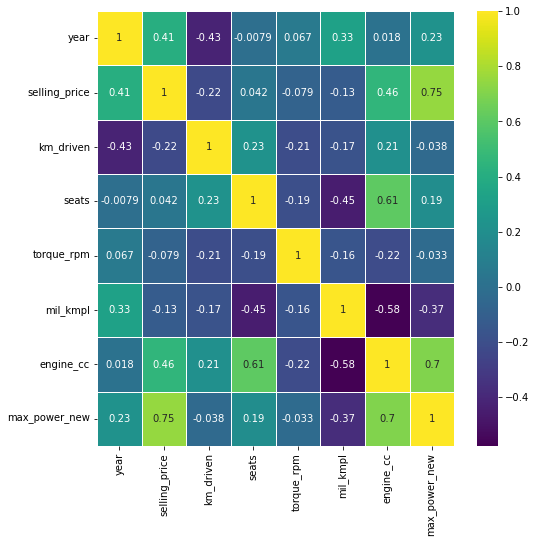

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(cars_new.corr(),annot=True,cmap='viridis',linewidths=1)

In [27]:
#Wir können sehen, dass der Verkaufspreis (den wir vorhersagen werden) 
# stark mit der maximalen Leistung des Autos korreliert
#---------------------------------------------------
# Die Korrelationswerte sind ziemlich gemittelt, was bedeutet,
# dass wir keine Spalte ausschließen, da jede Spalte uns neue liefern kann
# Informationen, die von keiner anderen Spalte bereitgestellt werden.

In [28]:
# Categorikal daten bearbeiten

cars_new['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [29]:
cars_new['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [30]:
cars_new['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [31]:
cars_new['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [32]:
# Kategorical daten nach Integer konvertieren

def ref1(x):
    if x == 'Manual':
        return 1
    else:
        return 0
    
cars_new['transmission'] = cars_new['transmission'].map(ref1)


In [33]:
def ref2(x):
    if x == 'Individual':
        return 1
    elif x == 'Dealer':
        return 0
    else:
        return -1
    
cars_new['seller_type'] = cars_new['seller_type'].map(ref2)


In [34]:
def ref3(x):
    if x == 'Petrol':
        return 1
    elif x == 'Diesel':
        return 0
    else:
        return -1
    
cars_new['fuel'] = cars_new['fuel'].map(ref3)

In [35]:
cars_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,First Owner,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,First Owner,5.0,4500,16.10,1298.0,88.20


In [36]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,16.10,1298.0,88.20


In [37]:
# die dummie daten von owner konvertieren

owners = pd.get_dummies(cars_new['owner'])

X = pd.concat([cars_new,owners],axis=1)

In [38]:
X.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1


In [39]:
y = X['selling_price']
X = X.drop(['selling_price','name','owner'],axis=1)

In [40]:
X.shape

(7906, 15)

In [41]:
X.head()

,year,km_driven,fuel,seller_type,transmission,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,145500,0,1,1,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,2014,120000,0,1,1,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,2006,140000,1,1,1,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,2010,127000,0,1,1,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,2007,120000,1,1,1,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [43]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [44]:
random_model = RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)

In [45]:
random_model.fit(Xtrain,ytrain)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [46]:
# accuracy abcheck

random_model_accuracy = round(random_model.score(Xtrain,ytrain)*100,2)#
print(round(random_model_accuracy,2),'%')

99.53 %


In [47]:
y_pred = random_model.predict(Xtest)


In [48]:
random_model_accuracy1 = round(random_model.score(Xtest,ytest)*100,2)#
random_model_accuracy1


96.64

In [49]:
Xtest[:1]

,year,km_driven,fuel,seller_type,transmission,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
7106,2014,183000,0,1,1,9.0,1500,15.96,2523.0,63.0,1,0,0,0,0


In [50]:
random_model.predict(np.array([2000,50000,1,0,1,4.0,2000,15.00,10000,50,1,1,1,1,1]).reshape(1,-1))

C:\Users\khale\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([101669.99])

In [51]:
np.array([2000,50000,1,0,1,4.0,2000,15.00,10000,50,1,1,1,1,1]).shape

(15,)

In [52]:
reg = LinearRegression()

reg.fit(Xtrain, ytrain)

LinearRegression()

In [53]:
print(round(reg.score(Xtrain, ytrain), 2))

0.69


In [54]:
print(round(reg.score(Xtest, ytest), 2))

0.68


In [55]:
import pickle 

saved_model = pickle.dump(random_model, open('Models/CarSelling.pickle','wb'))

In [56]:
import sklearn

In [57]:
sklearn.__version__

'1.0.2'

In [60]:
1 + "a"

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [59]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\khale\anaconda3\lib\site-packages
Requires: scipy, threadpoolctl, numpy, joblib
Required-by: scikit-learn-intelex, pyod, lightgbm, alibi-detect
